In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
df=pd.read_csv('data.csv',encoding='utf-8')
df

,text,label,score
0,趵突泉管好你自己,1,0.646242
1,防李清照的围挡哈哈哈哈,2,0.909193
2,大青岛,2,0.987700
3,扑棱鹅子,2,0.561283
4,轩轩的家乡,2,0.999437
...,...,...,...
6970,红红火火恍恍惚惚,2,0.983640
6971,还有一只在扭屁股,2,0.012634
6972,小胖子,2,0.983712
6973,老司机,2,0.742762


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6975 entries, 0 to 6974
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    6975 non-null   object 
 1   label   6975 non-null   int64  
 2   score   6975 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 163.6+ KB


In [57]:
df.isnull()

,text,label,score
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
6970,False,False,False
6971,False,False,False
6972,False,False,False
6973,False,False,False


In [58]:
# 按照某一标签分组并统计数量
counts = df.groupby('label')['label'].count()
counts

label
0    1187
1     254
2    5534
Name: label, dtype: int64

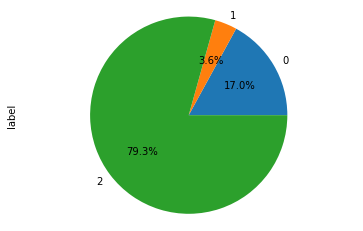

In [59]:
# 绘制饼图
counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.show()

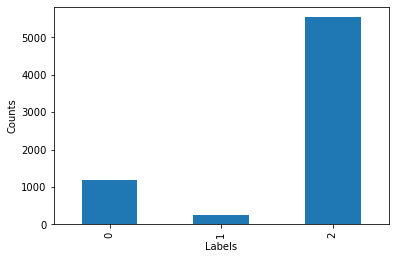

In [60]:
# 绘制柱状图
counts.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.show()

##使用svm进行情感分析

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [70]:
# 读取csv文件
df = pd.read_csv('data.csv',encoding='utf-8')
df.head()

,text,label,score
0,趵突泉管好你自己,1,0.646242
1,防李清照的围挡哈哈哈哈,2,0.909193
2,大青岛,2,0.987700
3,扑棱鹅子,2,0.561283
4,轩轩的家乡,2,0.999437


In [71]:
df.replace({"label":{1:0}},inplace=True)
df.head(10)

,text,label,score
0,趵突泉管好你自己,0,0.646242
1,防李清照的围挡哈哈哈哈,2,0.909193
2,大青岛,2,0.987700
3,扑棱鹅子,2,0.561283
4,轩轩的家乡,2,0.999437
5,小宋老师的姐妹等等,2,0.992130
6,年级第一我要当年级第一,2,0.991552
7,云梦,2,0.921046
8,没办法山东每个城市都很优秀很有特点你说气不气哈哈哈哈哈哈哈,2,0.614598
9,小宋是宋亚轩,2,0.930163


In [77]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(df['text'].tolist(), df['label'].tolist(), test_size=0.4, random_state=42)

In [78]:
# 提取特征
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [79]:
# 训练模型
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [80]:
# 预测
y_pred = model.predict(X_test)

In [81]:
# 测试集效果检验
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))
print("准确率:", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.12      0.21       604
           2       0.80      1.00      0.89      2186

    accuracy                           0.81      2790
   macro avg       0.90      0.56      0.55      2790
weighted avg       0.84      0.81      0.74      2790

准确率: 0.8089605734767025


In [82]:
score1=metrics.accuracy_score(y_test, y_pred)
score1

0.8089605734767025

In [83]:
# 训练模型
model = SVC(kernel='poly')
model.fit(X_train, y_train)

SVC(kernel='poly')

In [84]:
# 预测
y_pred = model.predict(X_test)

In [85]:
# 测试集效果检验
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))
print("准确率:", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.12      0.21       604
           2       0.80      1.00      0.89      2186

    accuracy                           0.81      2790
   macro avg       0.90      0.56      0.55      2790
weighted avg       0.84      0.81      0.74      2790

准确率: 0.8089605734767025


In [86]:
score2=metrics.accuracy_score(y_test, y_pred)
score2

0.8089605734767025

In [87]:
# 训练模型
model = SVC(kernel='sigmoid')
model.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [88]:
# 预测
y_pred = model.predict(X_test)

In [89]:
# 测试集效果检验
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))
print("准确率:", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.06      0.12       604
           2       0.79      1.00      0.89      2186

    accuracy                           0.80      2790
   macro avg       0.90      0.53      0.50      2790
weighted avg       0.84      0.80      0.72      2790

准确率: 0.7967741935483871


In [90]:
score3=metrics.accuracy_score(y_test, y_pred)
score3

0.7967741935483871

In [91]:
# 训练模型
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [92]:
# 预测
y_pred = model.predict(X_test)

In [93]:
# 测试集效果检验
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))
print("准确率:", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.12      0.21       604
           2       0.80      1.00      0.89      2186

    accuracy                           0.81      2790
   macro avg       0.90      0.56      0.55      2790
weighted avg       0.84      0.81      0.74      2790

准确率: 0.8089605734767025


In [94]:
score4=metrics.accuracy_score(y_test, y_pred)
score4

0.8089605734767025

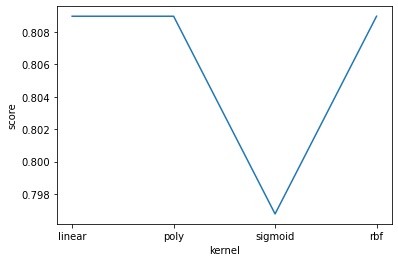

In [97]:
import matplotlib.pyplot as plt
score=[score1,score2,score3,score4]
kernel=['linear','poly','sigmoid','rbf']
plt.xlabel('kernel')
plt.ylabel('score')
plt.plot(kernel,score)